# Explore LHC dataset

In [1]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import corner
import logging
from sklearn.manifold import TSNE

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

sys.path.append("../../")
from experiments.simulators.collider import WBFLoader


## Analyze data

In [2]:
n = 10000

In [3]:
sim = WBFLoader()
sim.latent_dim()

14

In [4]:
x, params = sim.load_dataset(train=True, dataset_dir="../data/samples/lhc", numpy=True, limit_samplesize=n)

14:53 experiments.simulators.collide INFO    Only using 10000 of 1000000 available samples


In [5]:
x_ = sim._preprocess(x, inverse=True)

## Viz

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000).fit_transform(x)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 14.883s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.856963
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.985985
[t-SNE] KL divergence after 1000 iterations: 2.180602


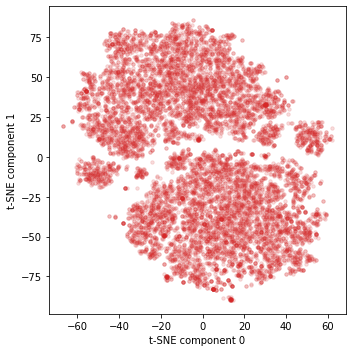

In [13]:
plt.figure(figsize=(5, 5))

plt.scatter(
    tsne[:, 0],
    tsne[:, 1],
    s=12.0,
    alpha=0.15,
    c="C3"
)

plt.xlabel("t-SNE component 0")
plt.ylabel("t-SNE component 1")

plt.tight_layout()
plt.savefig("../figures/lhc_tsne.pdf")

## Closure test vs noise

In [14]:
np.mean(sim.distance_from_manifold(x))

0.00019846456674846893

In [15]:
noises = np.geomspace(1.e-9, 1., 100)

closure = []

for noise in noises:
    closure.append(sim.distance_from_manifold(x + noise * np.random.normal(size=x.shape)))

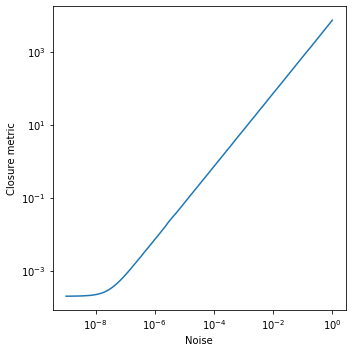

In [16]:
plt.figure(figsize=(5,5))

plt.plot(noises, closure)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Noise")
plt.ylabel("Closure metric")

plt.tight_layout()
plt.savefig("../figures/lhc_closure_vs_noise.pdf")
